In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gradient_descents import classic_grad_descent, stochastic_grad_descent, momentum_grad_descent, rmsprop_grad_descent, adam_grad_descent
from hypotheses import Linear, Polynomial
from cost_functions import MSE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6.5

## Read Data

In [3]:
def individual_task(h_type, degree, scaler):
    df = pd.read_csv('data/restaurant_revenue.txt', header=None, sep=',')
    if scaler is not None:
        df = pd.DataFrame(scaler.fit_transform(df.values))
    X = df[[0]].values
    y = df[[1]].values
    return h_type(X, y, degree=degree)


In [4]:
max_num_itter = 1000

## Classic GD

In [5]:
use_scaler = True

In [6]:
h = individual_task(Polynomial, 1, StandardScaler() if use_scaler else None)
h.weight = np.zeros(h.weight.shape)
# h.y = h.y **2
loss_history1, weights_history1, y_pred_history1 = classic_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.01, eps=0, mini_batch_size=32)

## SGD

In [7]:
h = individual_task(Polynomial, 1, StandardScaler() if use_scaler else None)
h.weight = np.zeros(h.weight.shape)
# h.y = h.y **2
loss_history2, weights_history2, y_pred_history2 = stochastic_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.01, eps=0, mini_batch_size=1)

## Momentum

In [8]:
h = individual_task(Polynomial, 1, StandardScaler() if use_scaler else None)
h.weight = np.zeros(h.weight.shape)
# h.y = h.y **2
loss_history3, weights_history3, y_pred_history3 = momentum_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.01, eps=0, beta=0.9, mini_batch_size=32)

## Rmsprop

In [9]:
h = individual_task(Polynomial, 1, StandardScaler() if use_scaler else None)
h.weight = np.zeros(h.weight.shape)
# h.y = h.y **2
loss_history4, weights_history4, y_pred_history4 = rmsprop_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.01, eps=0, beta=0.9, epsilon=1e-6, mini_batch_size=32)

## Adam

In [10]:
h = individual_task(Polynomial, 1, StandardScaler() if use_scaler else None)
h.weight = np.zeros(h.weight.shape)
# h.y = h.y **2
loss_history5, weights_history5, y_pred_history5 = adam_grad_descent(h, max_num_itter, MSE, regularization=None, C=1, alpha=0.01, eps=0, beta1=0.9, beta2=0.999, epsilon=1e-6, mini_batch_size=32)

## Gif Creation

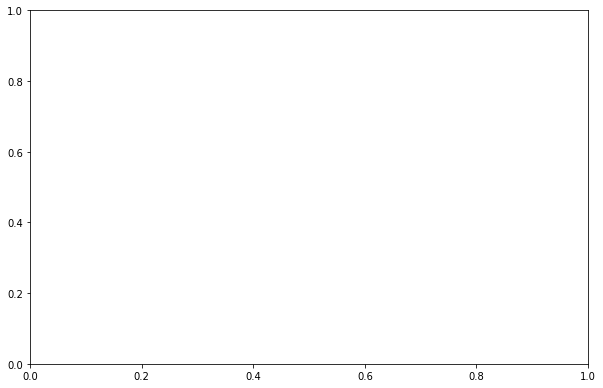

In [11]:
x = h.X_raw[:, 1]
y = list(map(lambda x: x[0], h.y))


for i in range(200):
    plt.plot(x,y,'o', label='Data')
    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history1[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='green', label='Classic GD')
    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history2[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='red', label='SGD')
    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history3[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='yellow', label='Momentum')
    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history4[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='cyan', label='Rmsprop')
    
    y_pred_history_temp = list(map(lambda x: x[0], y_pred_history5[i]))
    XY = list(zip(x, y_pred_history_temp))
    XY.sort(key=lambda x: x[0])
    
    plt.plot([i[0] for i in XY], [i[1] for i in XY], c='magenta', label='Adam')
    
    plt.title("Comparison of approximate curve")
    plt.ylim([-1,4])
   
    plt.legend(loc='upper left')

    if i>=0 and i<=9:
        plt.savefig(f'image/00{i}.png')
    elif i>=10 and i<=99:
        plt.savefig(f'image/0{i}.png')
    else:
        plt.savefig(f'image/{i}.png')
    plt.cla()
            
           

In [23]:
!pip install glob3

In [22]:
!pip install moviepy --user

In [21]:
!pip install numpy==1.17.3 --user

  Using cached https://files.pythonhosted.org/packages/e9/dd/a177f27765b1e5f94fa879cbeef61f8807086371d0b6aa232b836d38b78b/numpy-1.17.3-cp37-cp37m-win_amd64.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
import glob
import moviepy.editor as mpy

In [33]:
gif_name = 'GD'
fps = 13
file_list = glob.glob('image/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

MoviePy - Building file GD.gif with imageio.


In [13]:
with open('loss_history.npy', 'wb') as f:
    np.save(f, np.array([loss_history1, loss_history2,loss_history3,loss_history4,loss_history5]))

In [15]:
with open('loss_history.npy', 'rb') as f:
    a = np.load(f)

In [16]:
a

array([[0.5       , 0.49301479, 0.48616858, ..., 0.14898422, 0.14898422,
        0.14898422],
       [0.5       , 0.49372603, 0.49356949, ..., 0.14942403, 0.14946999,
        0.14951429],
       [0.5       , 0.49401791, 0.48089746, ..., 0.14949071, 0.14951569,
        0.14948758],
       [0.5       , 0.47450411, 0.4555329 , ..., 0.14947774, 0.14948571,
        0.14952164],
       [0.5       , 0.49172128, 0.48348551, ..., 0.15012709, 0.1501406 ,
        0.1501022 ]])